# Title: CORRELATION MODEL IN THE ADOPTION OF E-PAYMENT SERVICES

## Load Libraries

In [2]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, KFold
from scipy.stats import pearsonr, spearmanr, kendalltau, pointbiserialr
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, matthews_corrcoef

%matplotlib inline

## Load Custom Made Libraries

In [3]:
from Utilities.CFS import *
from Utilities.accuracy import *
from Utilities.corr_matrix import *
from Utilities.forward_selection import *
from Utilities.backward_elimination import *

from Visualization.model_graph import *
from Visualization.network_graph import *

## Load Dataset

In [4]:
df = pd.read_csv("Dataset/E-payment Cryptocurrency Coin.csv")

## Label Binarizer

In [13]:
def convert_nominal(arr, term_arr):
    tmp_dict = {val:ind for (ind, val) in enumerate(term_arr)}
    return arr.map(lambda x : tmp_dict[x])

## Split Dataset

In [14]:
mod_fac_df = pd.DataFrame()

column_arr = ["Age", "Gender", "Marital Status", "Education Level", "Work Industry", "Work Position"]

for (ind, col_name) in enumerate(column_arr):
    mod_fac_df[col_name] = df.iloc[:, 6 + ind]
    
# Replace Values in Work Industry
mod_fac_df = mod_fac_df.replace("Baking / Finance", "Banking / Finance")

# Label Binarize all columns
# Age
mod_fac_df["Age"] = convert_nominal(mod_fac_df["Age"], ["< 25 years", "26 - 40 years", "41 - 55 years", "above 55 years"])

# Gender
mod_fac_df["Gender"] = convert_nominal(mod_fac_df["Gender"], ["Male", "Female"])

# Marital Status
mod_fac_df["Marital Status"] = convert_nominal(mod_fac_df["Marital Status"], ["Single", "Married", "Other"])

# Education Level
mod_fac_df["Education Level"] = convert_nominal(mod_fac_df["Education Level"], ['Primary school', 'Secondary/High school', 'College/university', 'Graduate school', 'Other'])

# Work Industry
mod_fac_df["Work Industry"] = convert_nominal(mod_fac_df["Work Industry"], ['Banking / Finance', 'Education', 'Healthcare', 'Manufacturing', 'Retail / Hypermarket', 'Other'])

# Work Position
mod_fac_df["Work Position"] = convert_nominal(mod_fac_df["Work Position"], ['Junior management', 'Middle management', 'Top management', 'Professional', 'Other'])


In [15]:
utaut_fac_df = pd.DataFrame()

column_arr = df.iloc[:, 28:].columns
column_arr = [col.split(": ")[0] for col in column_arr]

for (ind, col_name) in enumerate(column_arr):
    utaut_fac_df[col_name] = df.iloc[:, 28 + ind]
    utaut_fac_df[col_name] = utaut_fac_df[col_name].map(lambda x : x - 1)
    
# Change Data Type to int
utaut_fac_df = utaut_fac_df.astype(int)

In [16]:
df_X = pd.DataFrame()

column_arr = df.iloc[:, 28:].columns
column_arr = [col.split(": ")[0] for col in column_arr]

for (ind, col_name) in enumerate(column_arr):
    df_X[col_name] = df.iloc[:, 28 + ind]
    
# Change Data Type to int
df_X = df_X.astype(int)

In [17]:
df_Y = df.iloc[:, [17]]

# Replace Values
df_Y = df_Y.replace("Yes", 1)
df_Y = df_Y.replace("No", 0)

# Change Data Type to int
df_Y = df_Y.astype(int)

# Convert Dataframe to Series
df_Y = df_Y.iloc[:, 0]

## Analysis

#### Merit Based Ranking

![merit_based_ranking.jpg](img/merit_based_ranking.jpg)

In [7]:
arr_list = []

for col_ind in range(df_X.shape[1]):
    name = df_X.columns[col_ind]
    merit = merit_calculation(df_X.iloc[:, [col_ind]], df_Y, pointbiserialr)
    arr_list.append((col_ind ,name, merit))
    
# Sort Column By Merit Value
arr_list = sorted(arr_list, key = lambda x : x[2], reverse = True)

mbf_df = pd.DataFrame(arr_list, index = [i + 1 for i in range(len(arr_list))], columns = ["Rank" ,"Factors", "Merit"])

mbf_df["Rank"] = [ind + 1 for ind in range(mbf_df.shape[0])]

mbf_df.style.hide_index()

#### Correlation Pairwise Ranking

![correlation_pairwise_ranking.jpg](img/correlation_pairwise_ranking.jpg)

#### Pearson

PE1       PE2       PE3       PE4       EE1       EE2       EE3  \
PE1  1.000000  0.862990  0.772275  0.772238  0.770145  0.689365  0.712132   
PE2  0.862990  1.000000  0.832397  0.804917  0.693209  0.666008  0.687403   
PE3  0.772275  0.832397  1.000000  0.819972  0.663135  0.728402  0.671230   
PE4  0.772238  0.804917  0.819972  1.000000  0.666847  0.726517  0.699258   
EE1  0.770145  0.693209  0.663135  0.666847  1.000000  0.796773  0.789954   
EE2  0.689365  0.666008  0.728402  0.726517  0.796773  1.000000  0.790297   
EE3  0.712132  0.687403  0.671230  0.699258  0.789954  0.790297  1.000000   
EE4  0.668039  0.692557  0.670896  0.725167  0.764045  0.818421  0.847060   
AT1  0.724931  0.722586  0.683267  0.706856  0.711578  0.695817  0.704307   
AT2  0.683005  0.688809  0.735440  0.751791  0.665014  0.701754  0.713846   
AT3  0.651560  0.685495  0.707070  0.740425  0.634225  0.655102  0.668360   
AT4  0.751918  0.742265  0.700504  0.732795  0.762149  0.713684  0.761757   
SI1  0.651440  0.642718  0.635468  0.574501  0.644230  0.561691  0.622608   
SI2  0.654976  0.642759  0.600411  0.588200  0.638360  0.608267  0.671996   
SI3  0.586418  0.565476  0.601935  0.681873  0.542159  0.592783  0.578512   
SI4  0.640697  0.623501  0.594398  0.670163  0.657195  0.641625  0.637287   
FC1  0.622882  0.537490  0.487346  0.575804  0.702207  0.666189  0.581583   
FC2  0.658865  0.600654  0.556863  0.647772  0.810128  0.771421  0.704366   
FC3  0.538767  0.533931  0.504945  0.552649  0.602720  0.617929  0.639996   
FC4  0.606522  0.593474  0.563421  0.594200  0.642295  0.641968  0.617548   
SE1  0.579820  0.571228  0.603189  0.608703  0.650597  0.685741  0.629534   
SE2  0.578489  0.561377  0.507474  0.552164  0.625418  0.653580  0.583274   
SE3  0.608277  0.576051  0.581737  0.636555  0.669163  0.693455  0.670382   
SE4  0.635433  0.609640  0.588770  0.618424  0.666445  0.636204  0.636302   
AX1  0.167919  0.184807  0.238056  0.133428  0.194954  0.182889  0.193694   
AX2 -0.066621 -0.001387  0.021300 -0.016741 -0.094352 -0.105864 -0.087725   
AX3 -0.083734 -0.026441 -0.068392 -0.038548 -0.104975 -0.153470 -0.072739   
AX4 -0.137436 -0.072570 -0.005408 -0.103917 -0.143949 -0.194278 -0.177596   
T1   0.666476  0.614172  0.603979  0.656835  0.716079  0.714352  0.718162   
T2   0.690724  0.693337  0.676620  0.693533  0.698980  0.722003  0.700417   
T3   0.672837  0.683771  0.690201  0.724641  0.722953  0.718216  0.766064   
T4   0.651355  0.595884  0.574801  0.598283  0.664964  0.635634  0.627677   
BI1  0.717239  0.666140  0.623333  0.671287  0.660215  0.657975  0.692715   
BI2  0.739539  0.677728  0.624151  0.656191  0.685917  0.646423  0.628599   
BI3  0.754702  0.714664  0.702558  0.738921  0.671337  0.703590  0.673143   
BI4  0.752688  0.730592  0.688426  0.735378  0.707180  0.672393  0.738013   

          EE4       AT1       AT2  ...       AX3       AX4        T1  \
PE1  0.668039  0.724931  0.683005  ... -0.083734 -0.137436  0.666476   
PE2  0.692557  0.722586  0.688809  ... -0.026441 -0.072570  0.614172   
PE3  0.670896  0.683267  0.735440  ... -0.068392 -0.005408  0.603979   
PE4  0.725167  0.706856  0.751791  ... -0.038548 -0.103917  0.656835   
EE1  0.764045  0.711578  0.665014  ... -0.104975 -0.143949  0.716079   
EE2  0.818421  0.695817  0.701754  ... -0.153470 -0.194278  0.714352   
EE3  0.847060  0.704307  0.713846  ... -0.072739 -0.177596  0.718162   
EE4  1.000000  0.709564  0.690941  ... -0.075414 -0.132420  0.685393   
AT1  0.709564  1.000000  0.830511  ...  0.004763 -0.096660  0.656507   
AT2  0.690941  0.830511  1.000000  ... -0.009362 -0.071853  0.623172   
AT3  0.710010  0.776370  0.802384  ... -0.046447 -0.083701  0.587421   
AT4  0.745083  0.794859  0.772483  ... -0.055136 -0.129015  0.694865   
SI1  0.559547  0.586616  0.578950  ...  0.006770 -0.015468  0.519763   
SI2  0.599834  0.569885  0.564904  ... -0.027920 -0.085520  0.553410   
SI3  0.581673  0.589636  0.590644  ...  0.054703 -0.038954  0.544713   
SI4  0.6

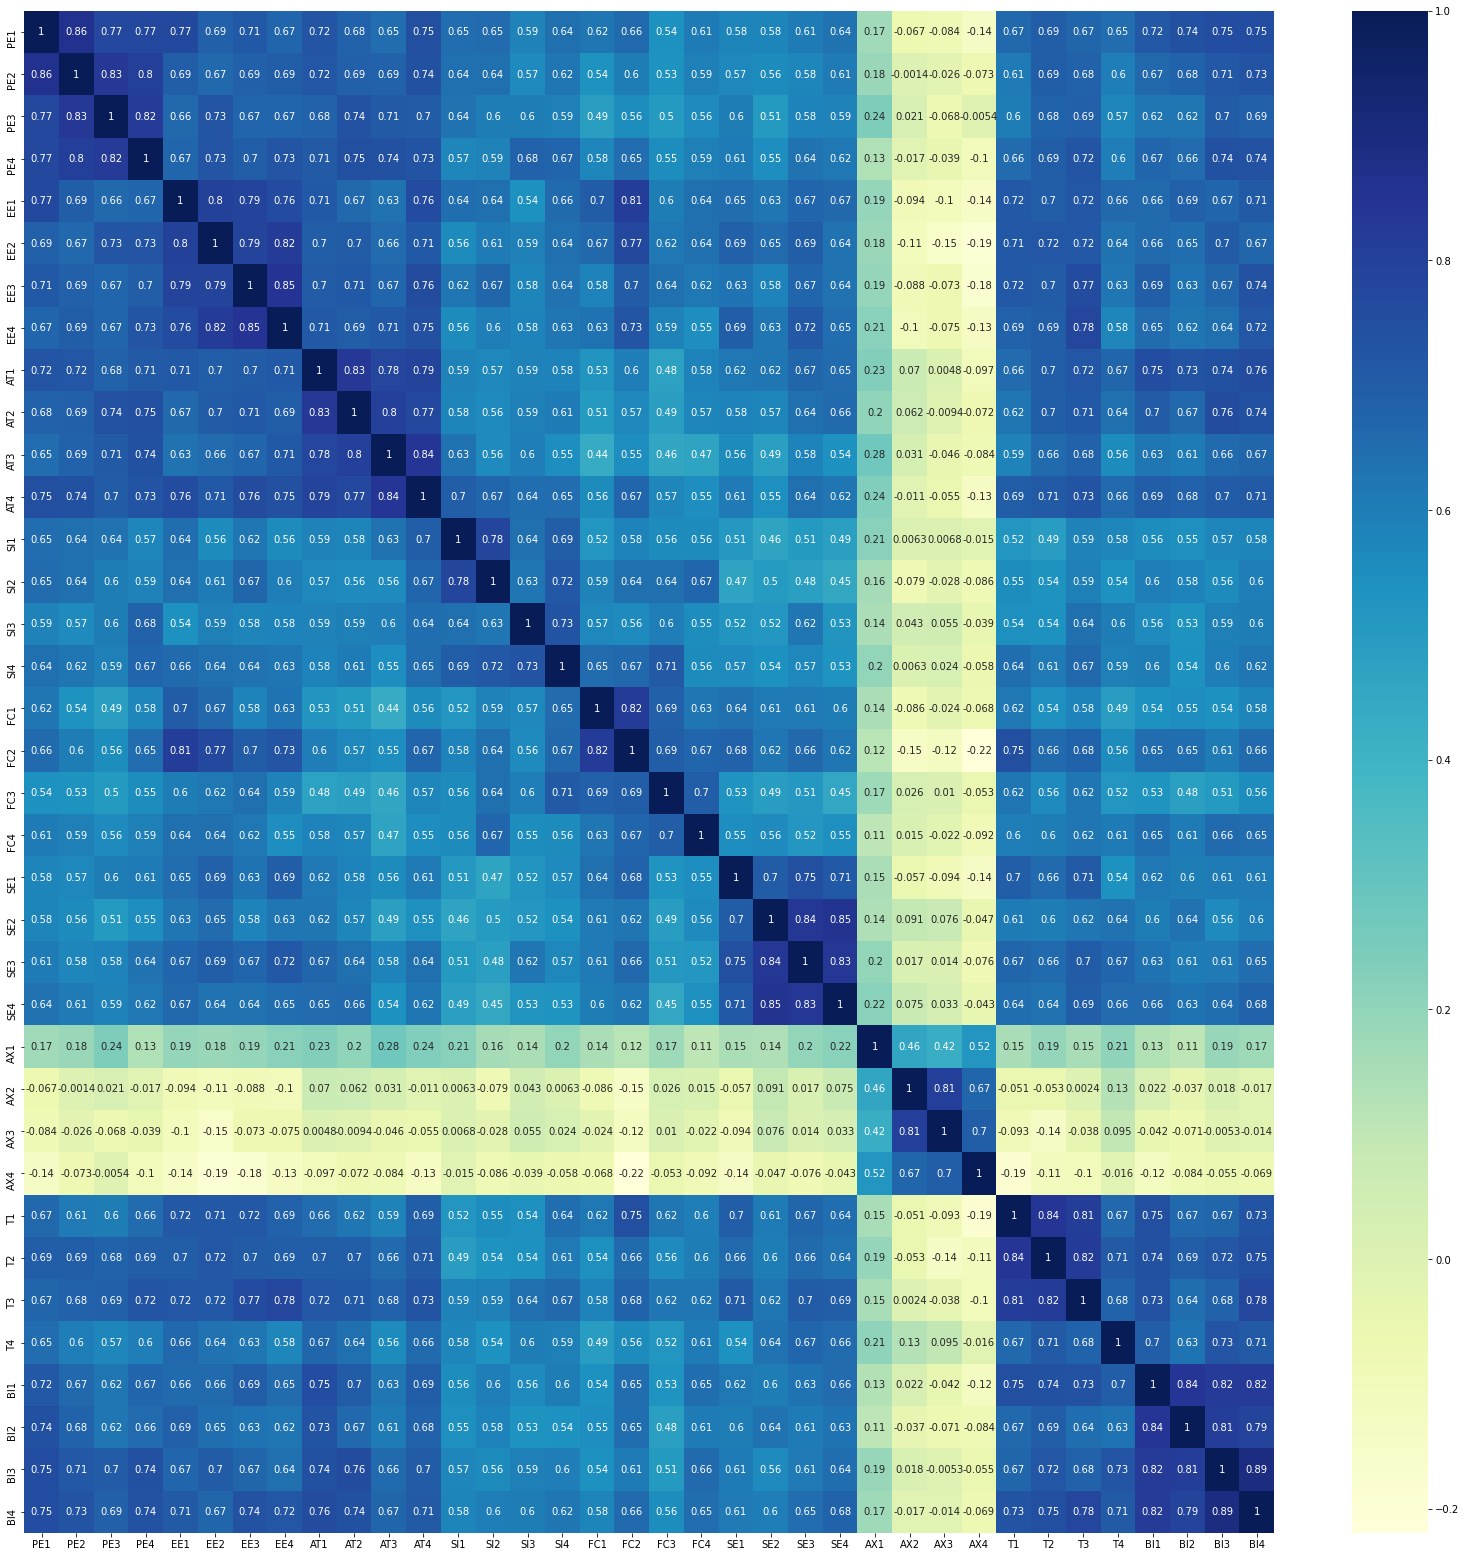

In [8]:
corr_df = create_corr_matrix(df_X, pearsonr)
display(corr_df)

fig = plt.figure(figsize=(28, 28))
sns.heatmap(corr_df,annot=True,cmap='YlGnBu')
plt.show()

#### Spearman

PE1       PE2       PE3       PE4       EE1       EE2       EE3  \
PE1  1.000000  0.835233  0.725600  0.730739  0.780623  0.654947  0.677241   
PE2  0.835233  1.000000  0.794513  0.765794  0.675508  0.645924  0.661695   
PE3  0.725600  0.794513  1.000000  0.774089  0.608697  0.677799  0.604741   
PE4  0.730739  0.765794  0.774089  1.000000  0.636272  0.681118  0.639758   
EE1  0.780623  0.675508  0.608697  0.636272  1.000000  0.762440  0.750047   
EE2  0.654947  0.645924  0.677799  0.681118  0.762440  1.000000  0.758405   
EE3  0.677241  0.661695  0.604741  0.639758  0.750047  0.758405  1.000000   
EE4  0.617229  0.661066  0.622669  0.702504  0.716287  0.797431  0.806975   
AT1  0.709411  0.690479  0.636145  0.674317  0.653017  0.635274  0.640132   
AT2  0.628712  0.647245  0.679483  0.733741  0.596293  0.633110  0.638569   
AT3  0.574655  0.610755  0.665550  0.682460  0.532636  0.573820  0.562026   
AT4  0.727514  0.711388  0.651371  0.678363  0.728187  0.668417  0.705449   
SI1  0.547166  0.563814  0.554506  0.455940  0.545926  0.457999  0.507247   
SI2  0.608680  0.597374  0.549674  0.529744  0.601414  0.566722  0.621143   
SI3  0.542343  0.526372  0.548207  0.630504  0.503564  0.541742  0.517585   
SI4  0.606554  0.605660  0.538555  0.651423  0.639400  0.603816  0.590932   
FC1  0.604344  0.515116  0.425128  0.544923  0.692196  0.642784  0.551067   
FC2  0.663244  0.596161  0.518875  0.629092  0.805945  0.757781  0.698691   
FC3  0.516819  0.533290  0.468582  0.527803  0.583975  0.618010  0.620509   
FC4  0.574885  0.566731  0.483308  0.564485  0.588065  0.594610  0.578817   
SE1  0.534715  0.524763  0.530007  0.554650  0.609570  0.635271  0.587870   
SE2  0.554460  0.547850  0.450279  0.519920  0.605538  0.613867  0.539525   
SE3  0.590539  0.568001  0.537992  0.617535  0.628430  0.646585  0.617838   
SE4  0.617705  0.581845  0.519852  0.585296  0.645786  0.584834  0.577861   
AX1  0.152508  0.157005  0.205734  0.092141  0.169832  0.156321  0.130790   
AX2 -0.075296 -0.030919  0.011096 -0.027371 -0.097753 -0.122216 -0.113272   
AX3 -0.123090 -0.051329 -0.090783 -0.043111 -0.128873 -0.168232 -0.116824   
AX4 -0.184555 -0.101325 -0.016761 -0.137880 -0.174636 -0.225122 -0.235763   
T1   0.660050  0.595035  0.547468  0.641736  0.701972  0.680571  0.696280   
T2   0.672744  0.675372  0.621414  0.681015  0.674657  0.679625  0.670219   
T3   0.627753  0.642348  0.630102  0.697144  0.677308  0.673919  0.700538   
T4   0.657686  0.604658  0.533779  0.594439  0.640904  0.599671  0.593044   
BI1  0.705704  0.636311  0.574985  0.655556  0.634953  0.628496  0.655935   
BI2  0.719527  0.654216  0.586452  0.621680  0.661093  0.608270  0.585558   
BI3  0.746661  0.715026  0.669027  0.727400  0.655963  0.662576  0.626968   
BI4  0.727006  0.718001  0.645617  0.729449  0.656850  0.620644  0.672501   

          EE4       AT1       AT2  ...       AX3       AX4        T1  \
PE1  0.617229  0.709411  0.628712  ... -0.123090 -0.184555  0.660050   
PE2  0.661066  0.690479  0.647245  ... -0.051329 -0.101325  0.595035   
PE3  0.622669  0.636145  0.679483  ... -0.090783 -0.016761  0.547468   
PE4  0.702504  0.674317  0.733741  ... -0.043111 -0.137880  0.641736   
EE1  0.716287  0.653017  0.596293  ... -0.128873 -0.174636  0.701972   
EE2  0.797431  0.635274  0.633110  ... -0.168232 -0.225122  0.680571   
EE3  0.806975  0.640132  0.638569  ... -0.116824 -0.235763  0.696280   
EE4  1.000000  0.644354  0.638600  ... -0.085887 -0.166941  0.645800   
AT1  0.644354  1.000000  0.780686  ... -0.013025 -0.139762  0.616839   
AT2  0.638600  0.780686  1.000000  ...  0.005595 -0.094146  0.575390   
AT3  0.631683  0.682452  0.741541  ... -0.048506 -0.085700  0.499787   
AT4  0.693356  0.737227  0.712752  ... -0.073499 -0.148126  0.655977   
SI1  0.440762  0.470377  0.484321  ... -0.011994 -0.004980  0.414769   
SI2  0.532870  0.505305  0.503915  ... -0.062772 -0.088320  0.529370   
SI3  0.540336  0.561513  0.562540  ...  0.039997 -0.062954  0.503948   
SI4  0.5

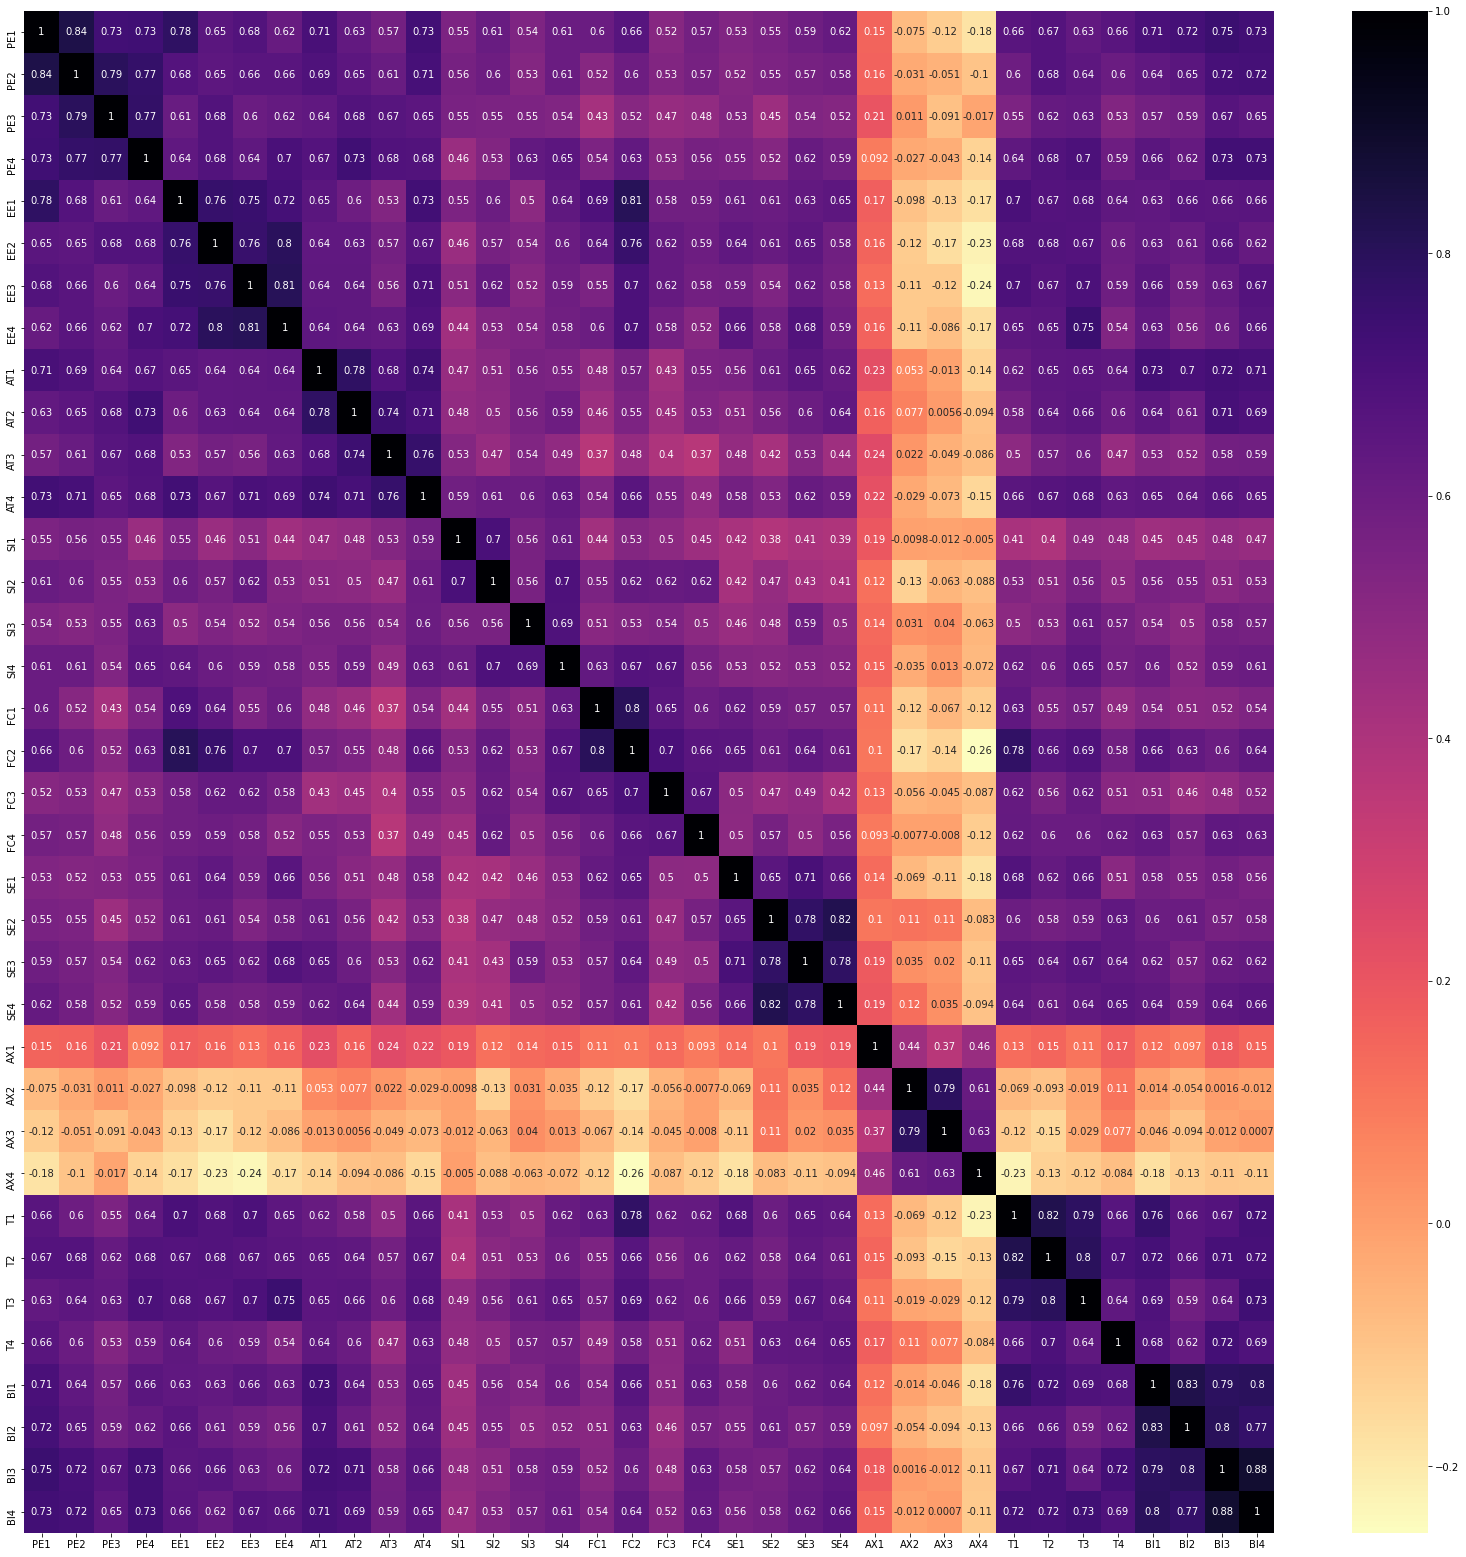

In [9]:
corr_df = create_corr_matrix(df_X, spearmanr)
display(corr_df)

fig = plt.figure(figsize=(28, 28))
sns.heatmap(corr_df,annot=True,cmap='magma_r')
plt.show()

#### Correlation Based Ranking

![correlation_based_ranking.jpg](img/correlation_based_ranking.jpg)

In [10]:
func = pointbiserialr

arr_list = []

for col_ind in range(df_X.shape[1]):
    name = df_X.columns[col_ind]
    corr, p_val = func(df_X.iloc[:, col_ind], df_Y)
    arr_list.append((col_ind ,name, corr))
    
# Sort Column By Correlation Value
arr_list = sorted(arr_list, key = lambda x : x[2], reverse = True)

mbf_df = pd.DataFrame(arr_list, index = [i + 1 for i in range(len(arr_list))], columns = ["Rank" ,"Factors", "Weight For Ranking"])

mbf_df["Rank"] = [ind + 1 for ind in range(mbf_df.shape[0])]

mbf_df.style.hide_index()

## Network Graph

![correlation_based_network.jpg](img/correlation_based_network.jpg)

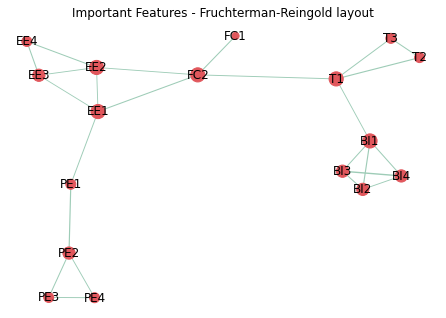

In [18]:
# Create Pairwise Correlation Matrix
corr_df = create_corr_matrix(utaut_fac_df, spearmanr)

Gx = create_graph(corr_df, 0.75)

# Get Edge Colours
edge_color = get_edge_color(Gx)

# Get Node Size
node_size = get_node_size(Gx, 50)

# Get Edge Width
edge_width = get_edge_width(Gx)

nx.draw(
    Gx,
    pos=nx.fruchterman_reingold_layout(Gx),
    with_labels=True,
    node_size=node_size,
    node_color="#e1575c",
    edge_color=edge_color,
    width = edge_width
)
plt.title("Important Features - Fruchterman-Reingold layout")
plt.show()

In [19]:
# Create Pairwise Correlation Matrix
corr_df = create_corr_matrix(utaut_fac_df, spearmanr)

network_graph(corr_df, "Important Features", 0.75)

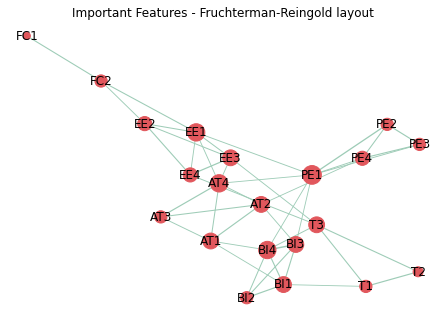

In [20]:
# Create Pairwise Correlation Matrix
corr_df = create_corr_matrix(utaut_fac_df, pearsonr)

Gx = create_graph(corr_df, 0.75)

# Get Edge Colours
edge_color = get_edge_color(Gx)

# Get Node Size
node_size = get_node_size(Gx, 50)

# Get Edge Width
edge_width = get_edge_width(Gx)

nx.draw(
    Gx,
    pos=nx.fruchterman_reingold_layout(Gx),
    with_labels=True,
    node_size=node_size,
    node_color="#e1575c",
    edge_color=edge_color,
    width = edge_width
)
plt.title("Important Features - Fruchterman-Reingold layout")
plt.show()

In [21]:
# Create Pairwise Correlation Matrix
corr_df = create_corr_matrix(utaut_fac_df, pearsonr)

network_graph(corr_df, "Important Features", 0.75)